### Install 

In [1]:
# install java
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

# New Section

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 199 kB 47.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=f3c248e3e4ba0c1217f0d829750bf77b1173fe91e7890db7b15631af4e0bc246
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [42]:
import findspark
findspark.init() 
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("arshahin").getOrCreate()
from pyspark.sql import functions as F
from pyspark.sql.types import *
import pyspark.sql.functions as F

In [43]:
from pyspark.ml.feature import VectorAssembler

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set1", 8, .75)
sns.set_style('whitegrid')

**Loading the data** (Upload the CSV file first and then run the cell below)

In [6]:
df = spark.read.option('header', 'true').csv('data.csv', inferSchema=True)
df.show()

+---------+-------+------+--------+------+-------+-------+
|    Depth|     DT|  RHOB|    NPHI|   PEF|    SGR|     RT|
+---------+-------+------+--------+------+-------+-------+
|3721.3032|52.0986|2.7239|  0.0223|4.8353|16.9627|82.0975|
|3680.0028|51.4541|2.7049|0.010361|5.1586|14.8379|101.001|
| 3355.848|58.9997|2.6341|  0.0694|3.0677| 40.096|11.7112|
|3607.0032|68.4025|2.4923|0.044807|2.4374|24.8052|89.8962|
|3303.1176|66.0666|2.5236|0.158167|3.9781|45.7906|20.7068|
| 3606.546|65.2695|2.4963|   0.048|2.4304|24.3348|87.0564|
|3529.1268|54.2133|2.7144|  0.0671|3.9831| 41.453|18.9175|
|3584.1432|59.7284|2.6358|  0.0569|2.7789| 46.672|76.0127|
|3307.5372|57.9967|2.6683|   0.097|4.1166|47.0263|37.2635|
|3494.6844|60.3743|2.5737|0.105074|4.7398|47.4318|43.6706|
| 3516.318|  66.24| 2.593|  0.1876| 3.546|  54.84|  2.736|
| 3147.822| 71.479|2.6358|0.197534|4.0042|51.6585|  7.861|
|3495.7512|55.3957| 2.653| 0.03968|4.8878| 39.568|41.7393|
|3256.1784|56.6238|2.7237|  0.0996|3.5452|48.4374|94.350

**Removing Nulls and Outliers**

In [7]:
df = df.dropna()

In [8]:
df = df.filter((df.DT >= 0) & (df.DT <= 100))\
      .filter((df.NPHI >= -0.1) & (df.NPHI <= 0.45))\
      .filter((df.RHOB >= 2) & (df.RHOB <= 3))\
      .filter((df.PEF >= 0) & (df.PEF <= 7))\
      .filter((df.RT >= 0) & (df.RT <= 2000))\
      .filter((df.SGR >= 0) & (df.SGR <= 150))

df.count()

6119

**Rescaling to 0 to 1**

In [9]:
for column in df.columns:
  df = df.withColumn(column, (F.col(column) - df.select(column).rdd.min()[0] ) / (df.select(column).rdd.max()[0] - df.select(column).rdd.min()[0]) )

df.show()

+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+
|              Depth|                 DT|               RHOB|               NPHI|                PEF|                SGR|                  RT|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+
| 0.7268370607028752|0.08115538163563772| 0.7257552483358936|0.06248771058000954|  0.619210463162947|0.06809766791025089| 0.04094910461196918|
| 0.6874818472262564|0.06841772402071222| 0.7062980030721966|0.03199973442084592| 0.6838652907767379|0.05314933070874451| 0.05040183675083841|
| 0.3785942492012779| 0.2175461480690936| 0.6337941628264211|0.18276442362939452| 0.2657187425005999| 0.2308444530117227|0.005752297663727261|
| 0.6179204182399072|0.40337958022056214| 0.4885816692268308| 0.1199626146267719|0.13966882649388043|0.12327101810924077| 0.04484885979653285|

**Initial Visualiztions**

In [10]:
df_pandas = df.toPandas()

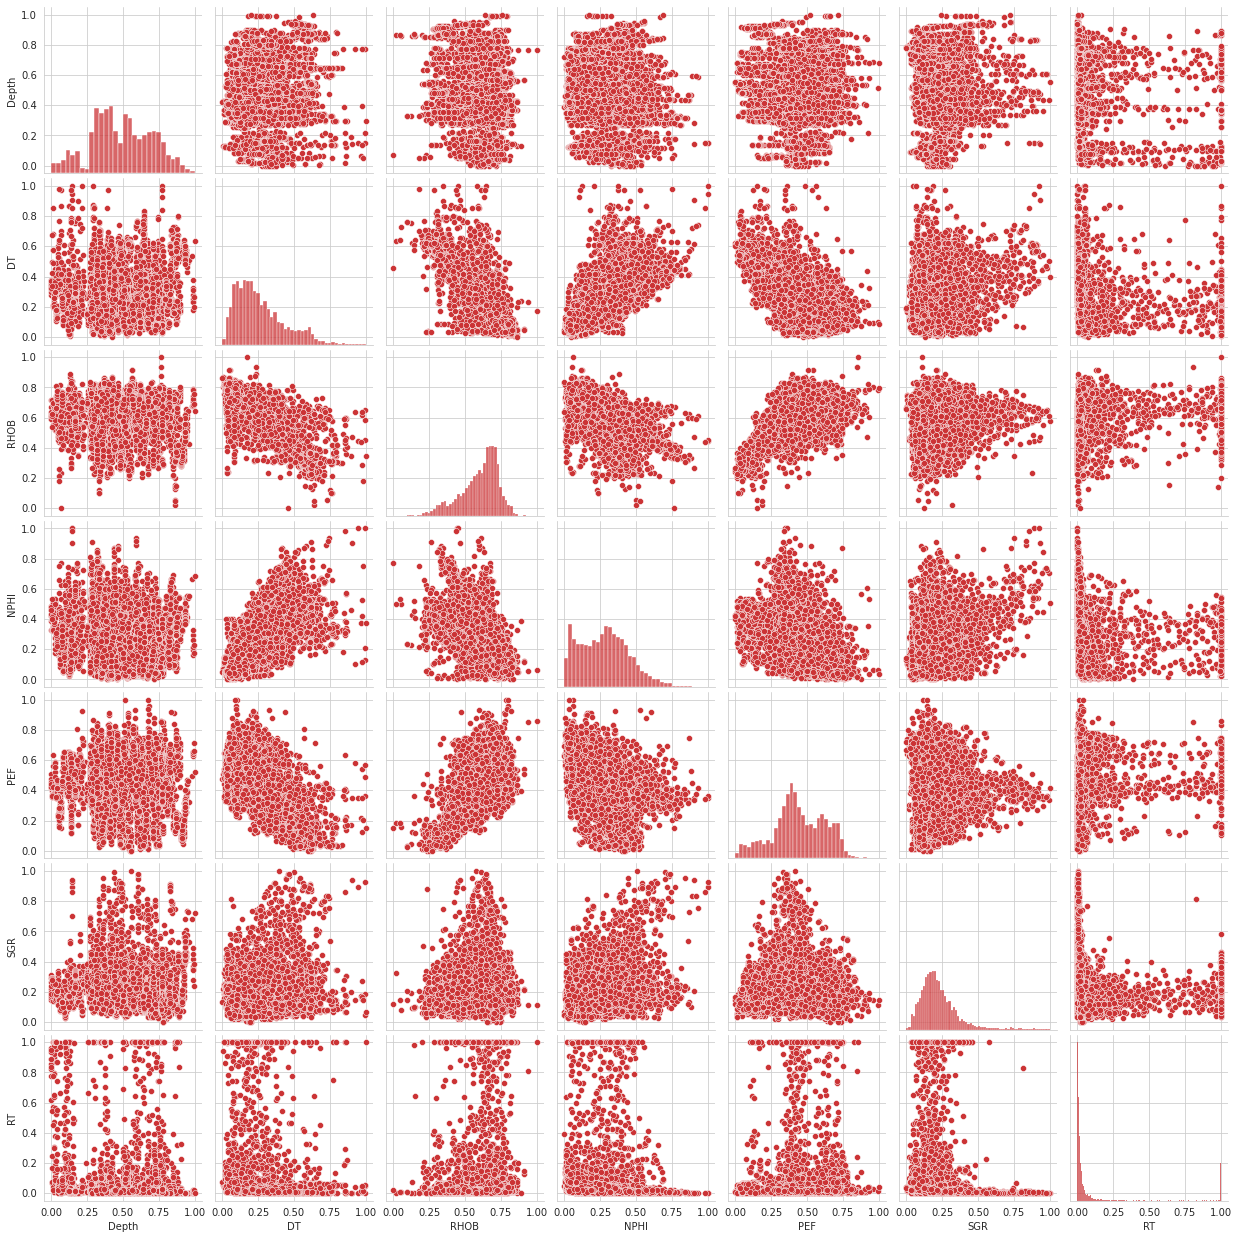

In [11]:
sns.pairplot(df_pandas)

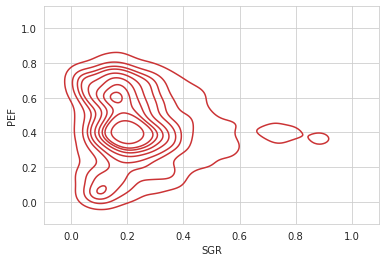

In [12]:
sns.kdeplot(data=df_pandas, x = 'SGR', y = 'PEF')

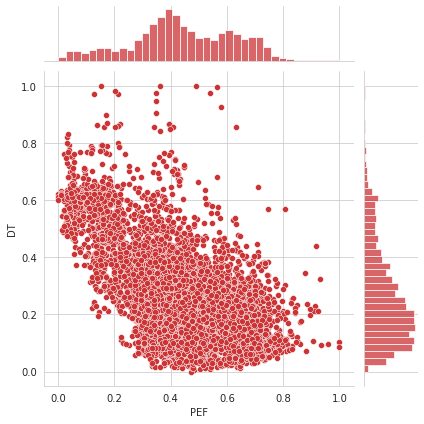

In [13]:
sns.jointplot(data=df_pandas, x = 'PEF', y = 'DT')

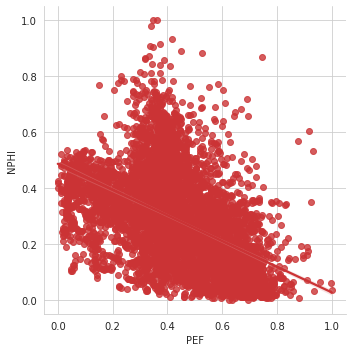

In [ ]:
sns.lmplot(data=df_pandas, x = 'PEF', y = 'NPHI')

### Clusterig methods to be tested here 

---



In [14]:
from pyspark.ml.clustering import KMeans, GaussianMixture, BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [15]:
def try_multiplie_clustering_algorithms(data):

  for clustering_model in [KMeans, GaussianMixture, BisectingKMeans]:

    for K in [4,5]:

        model_name = str(clustering_model).split('pyspark.ml.clustering')[1].replace('.','').replace("'>",'')

        assemble=VectorAssembler(inputCols=['DT', 'RHOB', 'NPHI', 'PEF', 'SGR', 'RT'] , outputCol = 'clustering_features')

        assembled_data=assemble.transform(data)

        model = clustering_model(featuresCol='clustering_features', predictionCol='clusters',k=K, seed = 100)

        model_fit=model.fit(assembled_data)

        model_transform=model_fit.transform(assembled_data) 

        evaluator = ClusteringEvaluator(featuresCol='clustering_features', predictionCol='clusters', metricName='silhouette', distanceMeasure='squaredEuclidean')

        evaluation_score=evaluator.evaluate(model_transform)

        print(f'At model {model_name} and number of clusters of {K} , The score is {evaluation_score}')

        print('*************************************************************')

        print('\n')


try_multiplie_clustering_algorithms(data = df)

At model KMeans and number of clusters of 4 , The score is 0.4663966596656912
*************************************************************


At model KMeans and number of clusters of 5 , The score is 0.47633516629311273
*************************************************************


At model GaussianMixture and number of clusters of 4 , The score is 0.07054061949261581
*************************************************************


At model GaussianMixture and number of clusters of 5 , The score is 0.030508855208215294
*************************************************************


At model BisectingKMeans and number of clusters of 4 , The score is 0.5094820299887769
*************************************************************


At model BisectingKMeans and number of clusters of 5 , The score is 0.38633551857434967
*************************************************************




# So the best one is BisectingKMeans and number of clusters of 4

In [16]:
# Now we will cluster with BisectingKMeans and 4 Clusters for these columns ['DT', 'RHOB', 'NPHI', 'PEF', 'SGR', 'RT']

assemble=VectorAssembler(inputCols=['DT', 'RHOB', 'NPHI', 'PEF', 'SGR', 'RT'] , outputCol = 'clustering_features')

assembled_data=assemble.transform(df)

model = BisectingKMeans(featuresCol='clustering_features', predictionCol='clusters',k=4, seed = 100)

model_fit=model.fit(assembled_data)

df_clustered = model_fit.transform(assembled_data)

df_clustered = df_clustered.drop('clustering_features')

df_clustered.show()

+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+
|              Depth|                 DT|               RHOB|               NPHI|                PEF|                SGR|                  RT|clusters|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+
| 0.7268370607028752|0.08115538163563772| 0.7257552483358936|0.06248771058000954|  0.619210463162947|0.06809766791025089| 0.04094910461196918|       0|
| 0.6874818472262564|0.06841772402071222| 0.7062980030721966|0.03199973442084592| 0.6838652907767379|0.05314933070874451| 0.05040183675083841|       0|
| 0.3785942492012779| 0.2175461480690936| 0.6337941628264211|0.18276442362939452| 0.2657187425005999| 0.2308444530117227|0.005752297663727261|       0|
| 0.6179204182399072|0.40337958022056214| 0.4885816692268308| 0.1199626146267719|0.13966

In [17]:
df_clustered.groupby('clusters').count().show()

+--------+-----+
|clusters|count|
+--------+-----+
|       1|  377|
|       3| 1521|
|       2|  834|
|       0| 3387|
+--------+-----+



**Visualizing the clusters**

In [18]:
df_clustered_pandas = df_clustered.toPandas()


def get_scatter_plot(x, y):
  plt.figure(figsize=(8,6))
  return sns.scatterplot(data=df_clustered_pandas, x = x, y = y, hue='clusters')

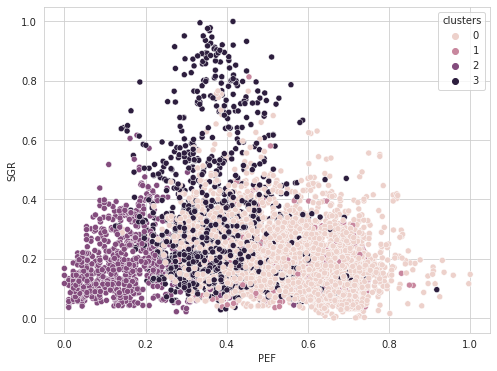

In [19]:
get_scatter_plot(x='PEF', y='SGR')

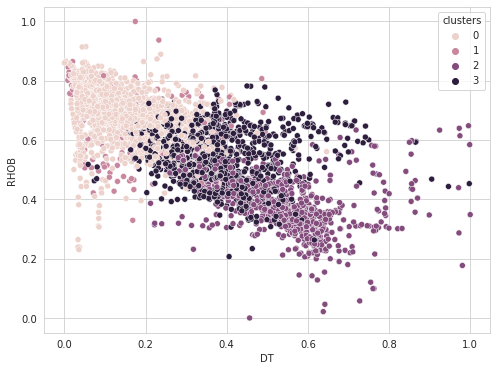

In [20]:
get_scatter_plot(x='DT', y='RHOB')

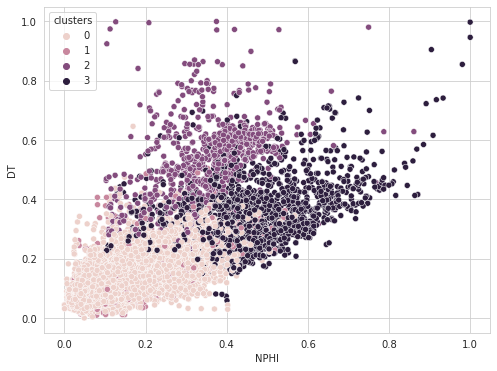

In [ ]:
get_scatter_plot(x='NPHI', y='DT')

In [21]:
df_clustered.show()

+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+
|              Depth|                 DT|               RHOB|               NPHI|                PEF|                SGR|                  RT|clusters|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+
| 0.7268370607028752|0.08115538163563772| 0.7257552483358936|0.06248771058000954|  0.619210463162947|0.06809766791025089| 0.04094910461196918|       0|
| 0.6874818472262564|0.06841772402071222| 0.7062980030721966|0.03199973442084592| 0.6838652907767379|0.05314933070874451| 0.05040183675083841|       0|
| 0.3785942492012779| 0.2175461480690936| 0.6337941628264211|0.18276442362939452| 0.2657187425005999| 0.2308444530117227|0.005752297663727261|       0|
| 0.6179204182399072|0.40337958022056214| 0.4885816692268308| 0.1199626146267719|0.13966

**Splitting the data By Clusters to 4 dataframes**

In [22]:
df_clustered_0  = df_clustered.filter(df_clustered.clusters == 0)
df_clustered_1  = df_clustered.filter(df_clustered.clusters == 1)
df_clustered_2  = df_clustered.filter(df_clustered.clusters == 2)
df_clustered_3  = df_clustered.filter(df_clustered.clusters == 3)

**Trying Regression Algorithms on cluster 0**

In [23]:
from pyspark.ml.regression import  DecisionTreeRegressor, LinearRegression, RandomForestRegressor, GBTRegressor, IsotonicRegression
from pyspark.mllib.evaluation import RegressionMetrics

In [24]:
def try_multiplie_regressors(data):

  for reg_model in [DecisionTreeRegressor, LinearRegression, RandomForestRegressor, GBTRegressor, IsotonicRegression]:

        model_name = str(reg_model).split('pyspark.ml.regression')[1].replace('.','').replace("'>",'')

        assemble=VectorAssembler(inputCols=['DT', 'RHOB', 'NPHI', 'SGR', 'RT'] , outputCol = 'regression_features')

        assembled_data=assemble.transform(data)

        model = reg_model(featuresCol='regression_features', predictionCol='regression_prediction',labelCol='PEF')

        model_fit=model.fit(assembled_data)

        lr_predict = model_fit.transform(assembled_data)

        valuesAndPreds = lr_predict.select(['PEF', 'regression_prediction'])
        valuesAndPreds = valuesAndPreds.rdd.map(tuple)


        metrics = RegressionMetrics(valuesAndPreds)

        print(f'for model {model_name} we got mean absolute error of {metrics.meanAbsoluteError}')
        print('********************************')
        print('\n')

        # # Mean absolute error


try_multiplie_regressors(data=df_clustered_0)

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


for model DecisionTreeRegressor we got mean absolute error of 0.07174552209902944
********************************


for model LinearRegression we got mean absolute error of 0.08742915895861633
********************************


for model RandomForestRegressor we got mean absolute error of 0.07635098035106506
********************************


for model GBTRegressor we got mean absolute error of 0.05893759291900854
********************************


for model IsotonicRegression we got mean absolute error of 0.11786490217479854
********************************




**So the best model that have less error here is GBTRegressor**

In [25]:
def train_and_validate_regressor(data):

    assemble=VectorAssembler(inputCols=['DT', 'RHOB', 'NPHI', 'SGR', 'RT'] , outputCol = 'regression_features')

    assembled_data=assemble.transform(data)

    model = GBTRegressor(featuresCol='regression_features', predictionCol='regression_prediction',labelCol='PEF')

    model_fit=model.fit(assembled_data)


    lr_predict = model_fit.transform(assembled_data)

    lr_predict = lr_predict.drop('regression_features')


    return lr_predict

In [26]:
df_clustered_all_with_reg = train_and_validate_regressor(data=df_clustered)
df_clustered_0_with_reg = train_and_validate_regressor(data=df_clustered_0)
df_clustered_1_with_reg = train_and_validate_regressor(data=df_clustered_1)
df_clustered_2_with_reg = train_and_validate_regressor(data=df_clustered_2)
df_clustered_3_with_reg = train_and_validate_regressor(data=df_clustered_3)


df_clustered_3_with_reg.show()

+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+---------------------+
|              Depth|                 DT|               RHOB|               NPHI|                PEF|                SGR|                  RT|clusters|regression_prediction|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------+---------------------+
|0.32834737147836185|0.35721372386260314| 0.5206349206349208|0.40944389257323216|0.44778417726581865| 0.2709069534953909|0.010250565033707002|       3|  0.44973898464948886|
| 0.5315063543284219| 0.3606407367880152|  0.591705069124424|0.48460534682339235| 0.3613710903127749|0.33457105490319955|0.001264231353637...|       3|   0.3841128811339373|
| 0.1803659599186756|0.46418237875014823| 0.6355350742447519| 0.5099732633293922| 0.4530037596992241|0.31218864959136194|0.0038269

**Visualizing the regressions Residuals**

In [27]:
def visulaize_regression(data):
  data = data.toPandas()
  data['residuals'] = data['regression_prediction'] - data['PEF']
  return sns.displot(data.residuals, bins=100)

### Visualize the residuals when applying regression on all clusters as a whole 

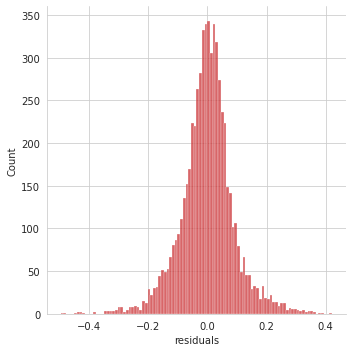

In [28]:
visulaize_regression(data=df_clustered_all_with_reg)

### Visualize the residual for cluster-based regression (cluster 0)

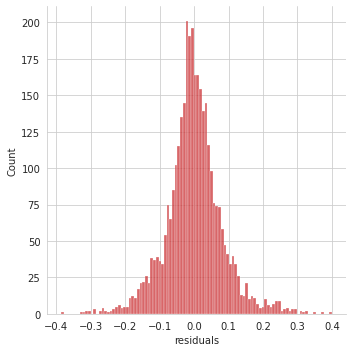

In [ ]:
visulaize_regression(data=df_clustered_0_with_reg)

### Visualize the residual for cluster-based regression (cluster 1)

---



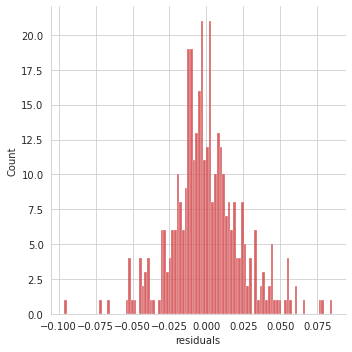

In [ ]:
visulaize_regression(data=df_clustered_1_with_reg)

### Visualize the residual for cluster-based regression (cluster 2)

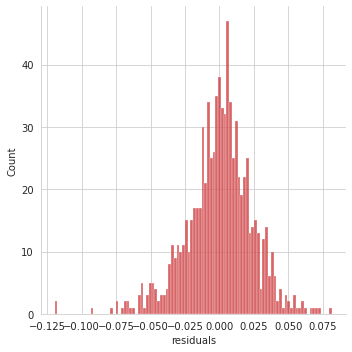

In [ ]:
visulaize_regression(data=df_clustered_2_with_reg)

### Visualize the residual for cluster-based regression (cluster 3)

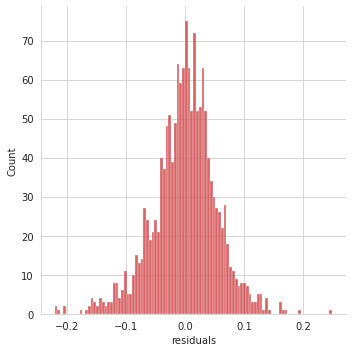

In [ ]:
visulaize_regression(data=df_clustered_3_with_reg)

## define a function to visualize regression results (prediction vs. true)

In [34]:
def visulaize_regression_scatter_plots(data):
  data = data.toPandas()
  return sns.scatterplot(data=data, x = 'regression_prediction', y = 'PEF')

##Regression visualization when the input is cluster 0

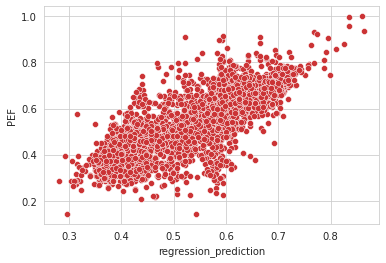

In [35]:
visulaize_regression_scatter_plots(data=df_clustered_0_with_reg)

##Regression visualization when the input is cluster 1

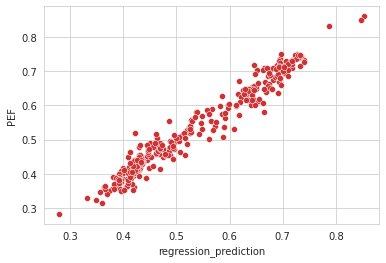

In [36]:
visulaize_regression_scatter_plots(data=df_clustered_1_with_reg)

##Regression visualization when the input is cluster 2

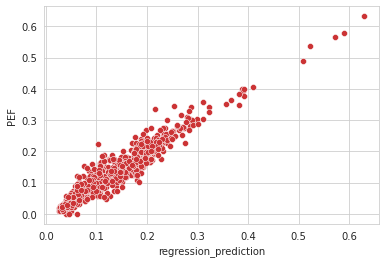

In [39]:
visulaize_regression_scatter_plots(data=df_clustered_2_with_reg)

##Regression visualization when the input is cluster 3

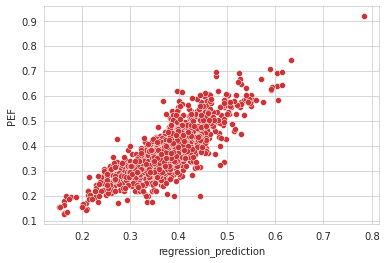

In [40]:
visulaize_regression_scatter_plots(data=df_clustered_3_with_reg)

Regression visualization when the input is all the 4 clsuters

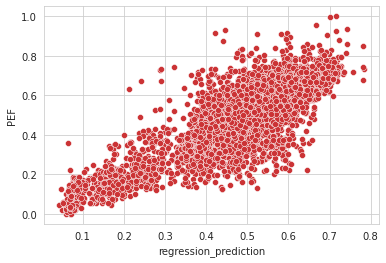

In [41]:
visulaize_regression_scatter_plots(data=df_clustered_all_with_reg)

#### Obviously cluster-based regression works better than applying regression on the entire clusters all at once 